In [1]:
from ml_tool.main import MLWorker

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("data\\train.csv")




In [2]:
list(df.columns)

['PassengerId',
 'HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'Age',
 'VIP',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Name',
 'Transported']

In [3]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [4]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


<Axes: xlabel='HomePlanet'>

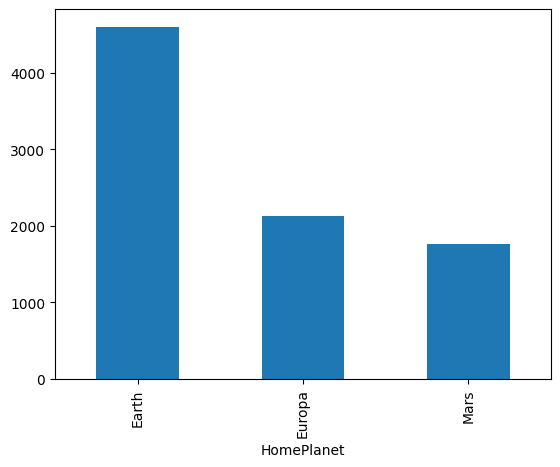

In [5]:
df['HomePlanet'].value_counts().plot(kind='bar')

In [6]:
df['CryoSleep'].value_counts()

CryoSleep
False    5439
True     3037
Name: count, dtype: int64

In [7]:
df['Cabin'].value_counts()

Cabin
G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: count, Length: 6560, dtype: int64

In [8]:
df['Destination'].value_counts()

Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64

<Axes: >

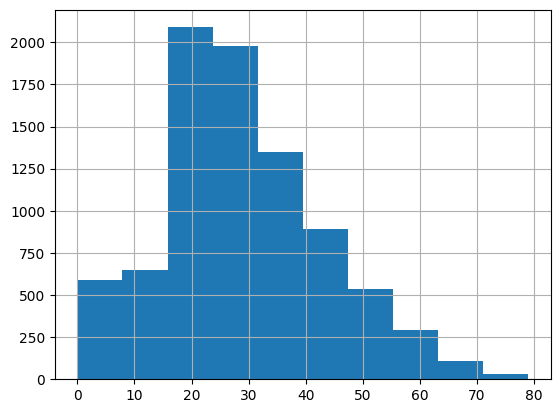

In [9]:
df['Age'].hist()

In [10]:
df['RoomService'].value_counts()

RoomService
0.0       5577
1.0        117
2.0         79
3.0         61
4.0         47
          ... 
1612.0       1
2598.0       1
632.0        1
378.0        1
745.0        1
Name: count, Length: 1273, dtype: int64

In [11]:
labels, uniques = pd.factorize(df['HomePlanet'])
df['HomePlanetLabeled'] = labels
labels, uniques = pd.factorize(df['Destination'])
df['DestinationLabeled'] = labels

In [12]:
df[["Deck", "Cabin_num", "Side"]] = df["Cabin"].str.split("/", expand=True)
labels, uniques = pd.factorize(df['Deck'])
df['DeckLabeled'] = labels
labels, uniques = pd.factorize(df['Side'])
df['SideLabeled'] = labels

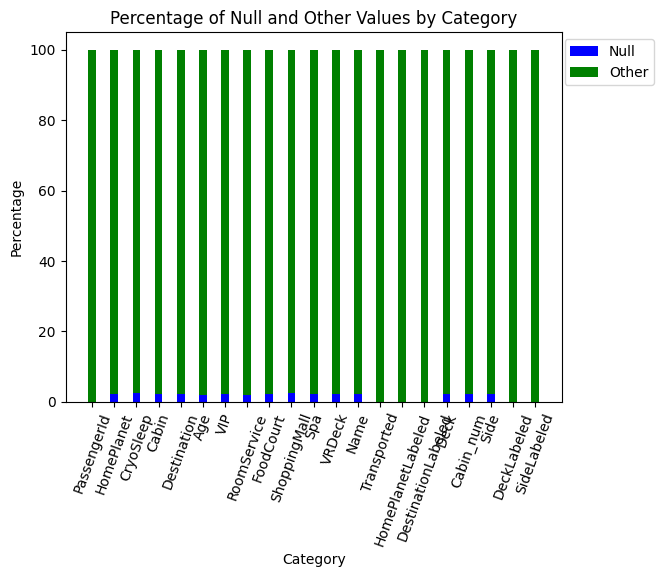

In [13]:
null_values = df.isnull().sum()
other_values = df.notnull().sum()

# Obliczanie procentowego udziału
total_values = null_values + other_values
null_percent = null_values / total_values * 100
other_percent = other_values / total_values * 100

# Tworzenie wykresu słupkowego
categories = df.columns
bar_width = 0.35  # Szerokość słupków
indices = np.arange(len(categories))  # Pozycje słupków

# Wykres dla nulli
plt.bar(indices, null_percent, bar_width, label='Null', color='blue')

# Wykres dla reszty danych, zaczynający się od końca nulli
plt.bar(indices, other_percent, bar_width, bottom=null_percent, label='Other', color='green')

# Dodawanie etykiet i tytułu
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.title('Percentage of Null and Other Values by Category')
plt.xticks(indices, categories,rotation=70)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))

# Wyświetlanie wykresu
plt.show()

In [14]:
df.fillna(-1,inplace=True)

In [15]:
df['CryoSleep'] = df['CryoSleep'].astype(int)
df['VIP'] = df['VIP'].astype(int)
df['Cabin_num'] =df['Cabin_num'].astype(int)

Folder models_output// już istnieje.
Folder models_output//spaceship_titanic już istnieje.
Utworzono folder: models_output//spaceship_titanic//2024-05-20_114701.654609
accuracy : 77.17
recall : 71.48
precision : 78.78
gini : 100.0
accuracy : 78.55
recall : 80.17
precision : 75.23
gini : 100.0
accuracy : 80.74
recall : 83.45
precision : 82.0
gini : 100.0
accuracy : 82.28
recall : 80.15
precision : 86.51
gini : 100.0
accuracy : 78.54
recall : 79.93
precision : 76.15
gini : 100.0
Params saved


C:\projects\spaceship_titanic\venv\lib\site-packages\mlflow\types\utils.py:394: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


Model data saved
Moded data reshaped


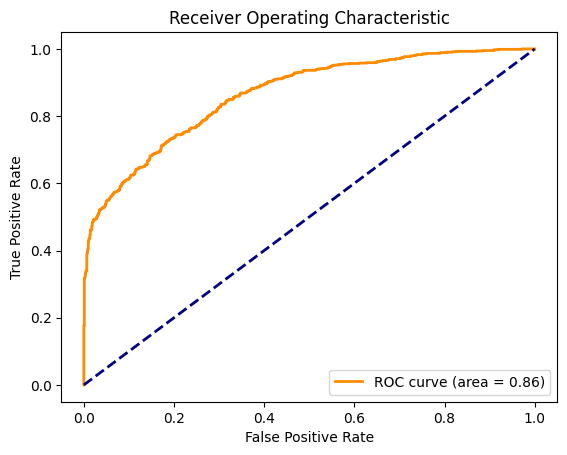

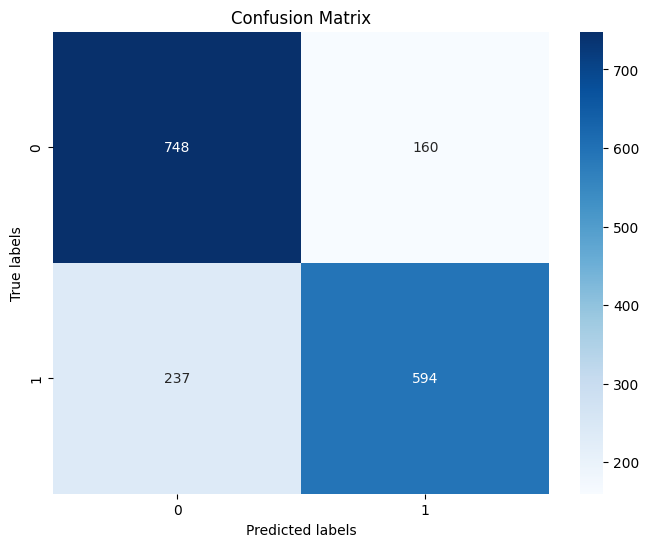

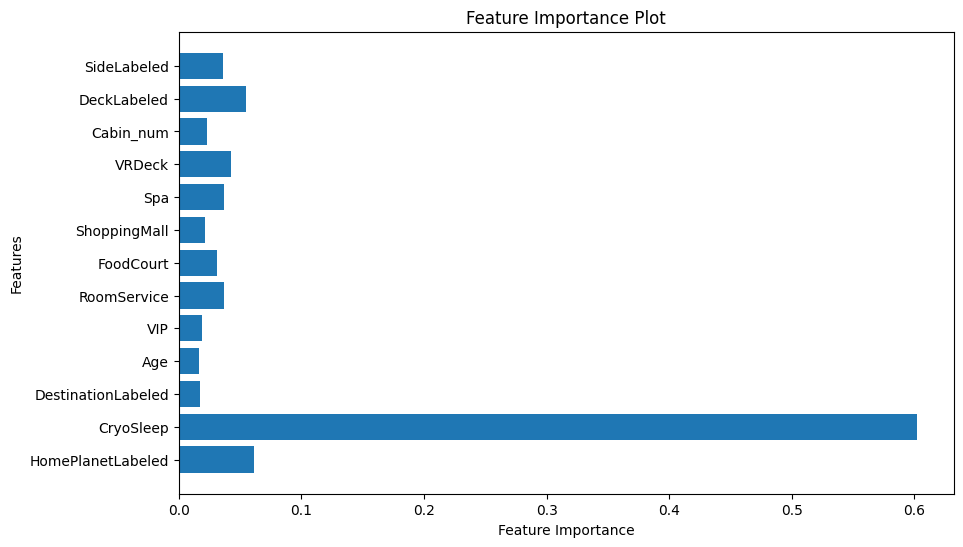

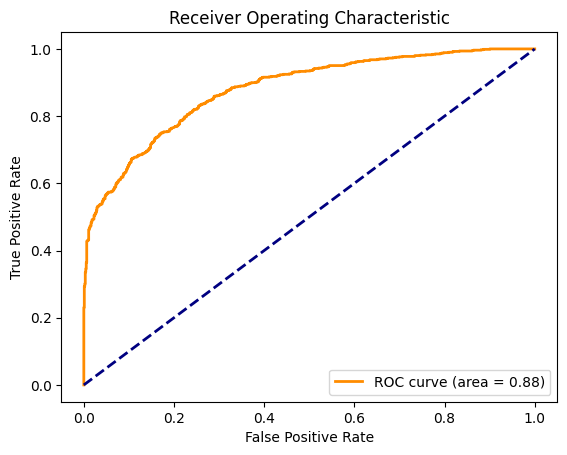

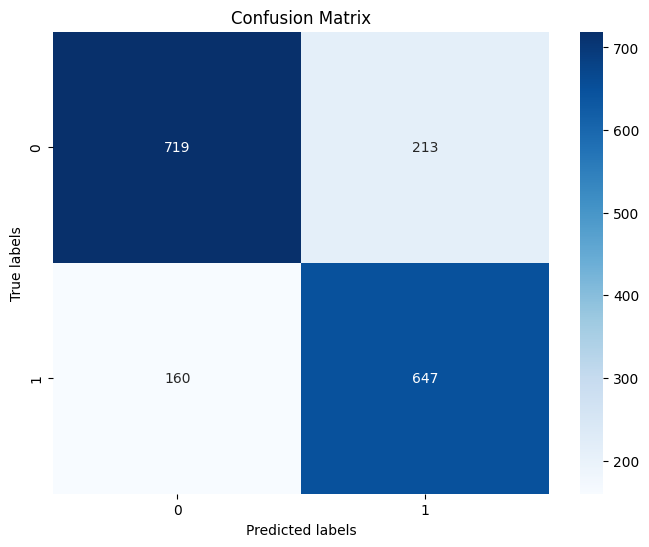

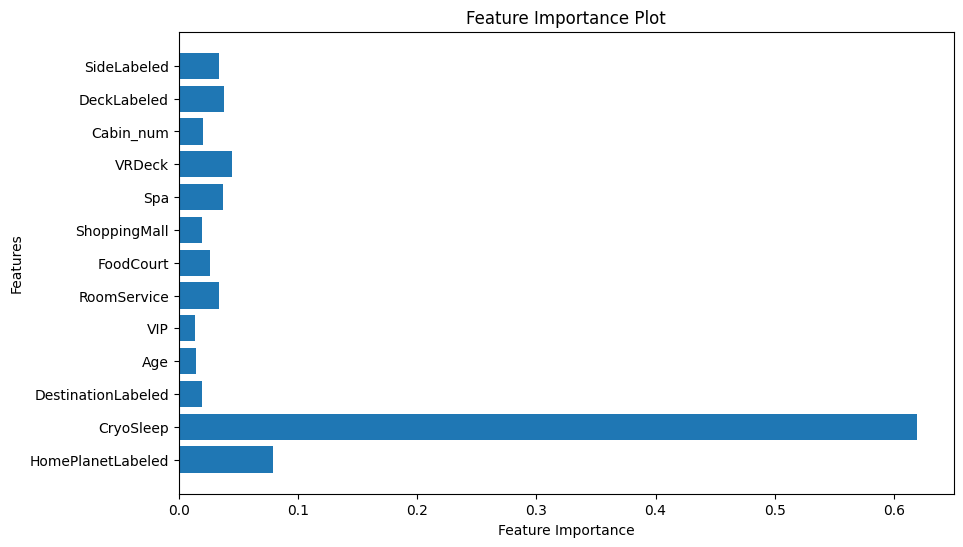

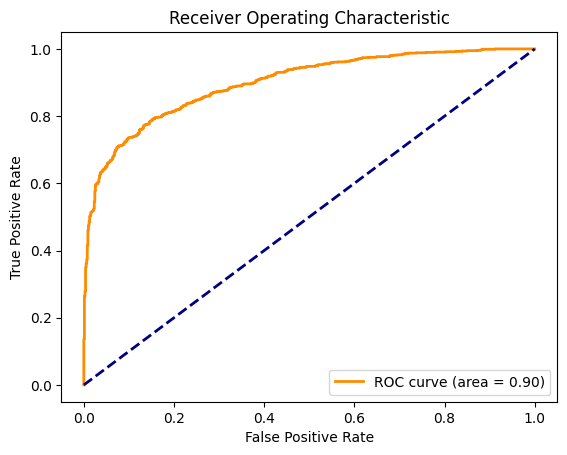

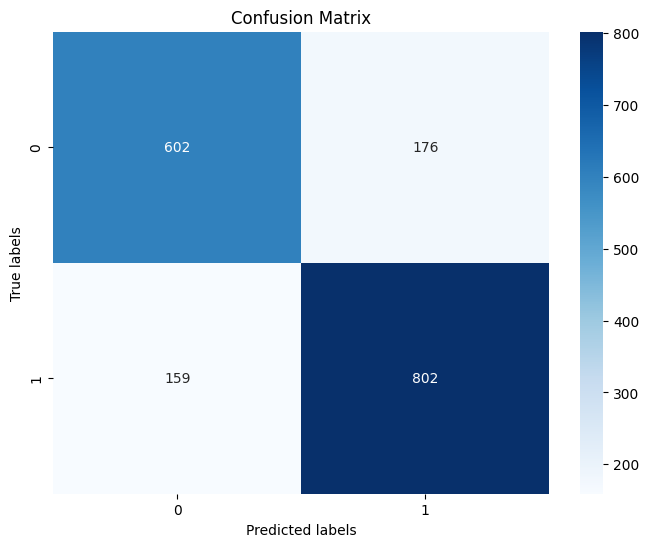

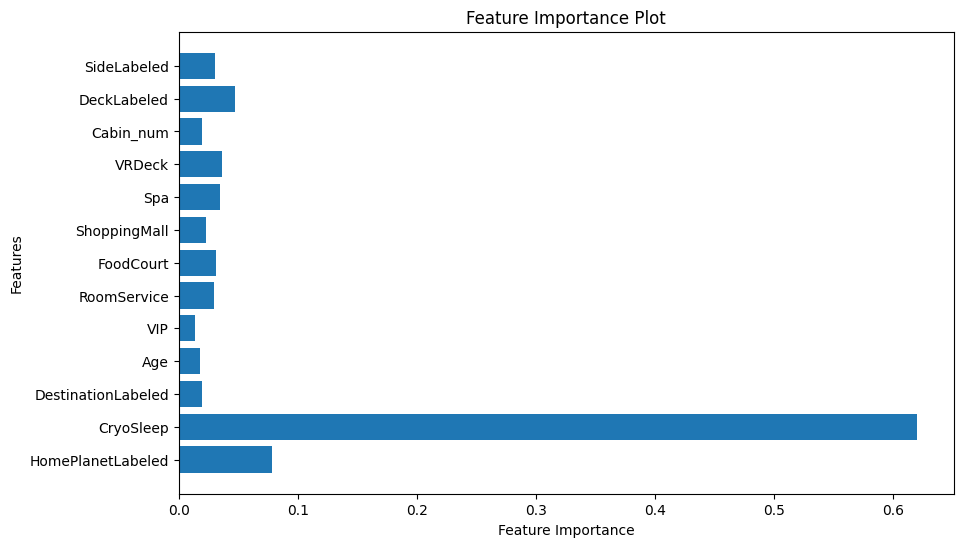

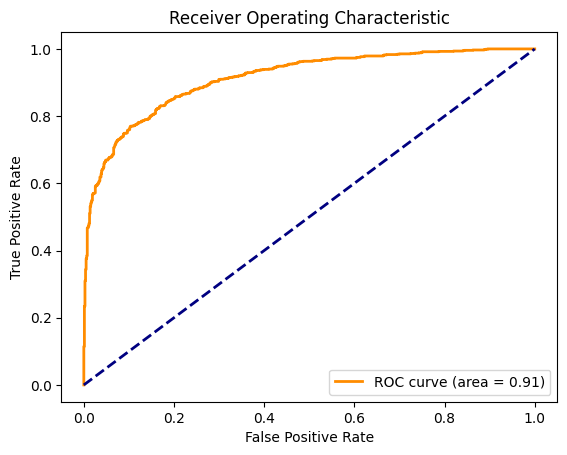

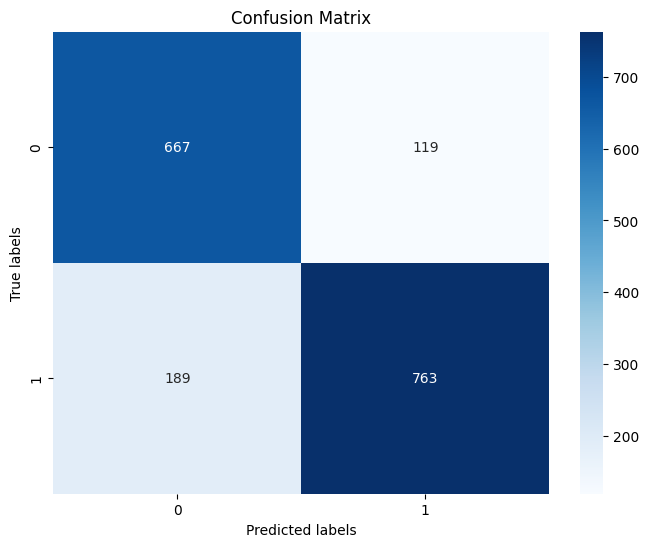

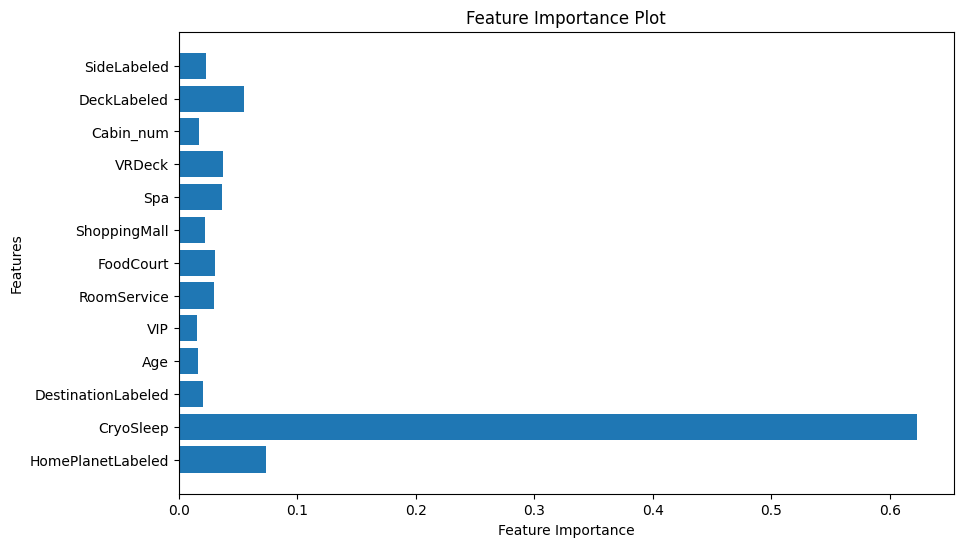

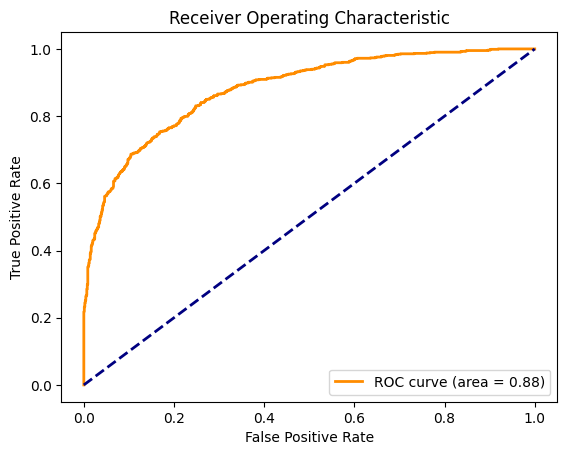

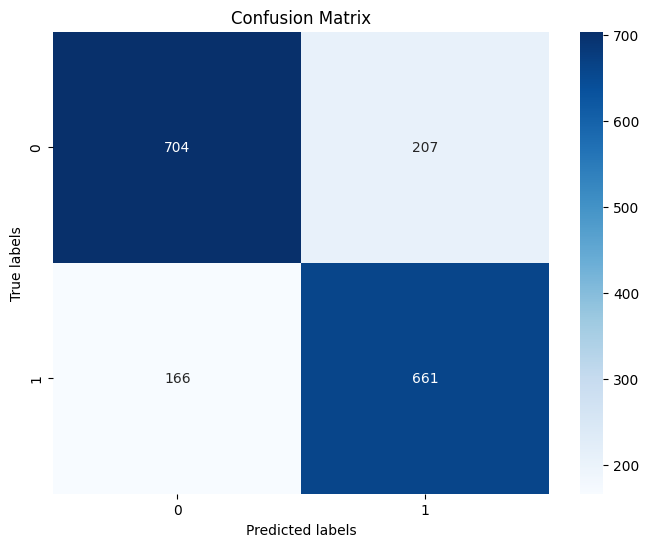

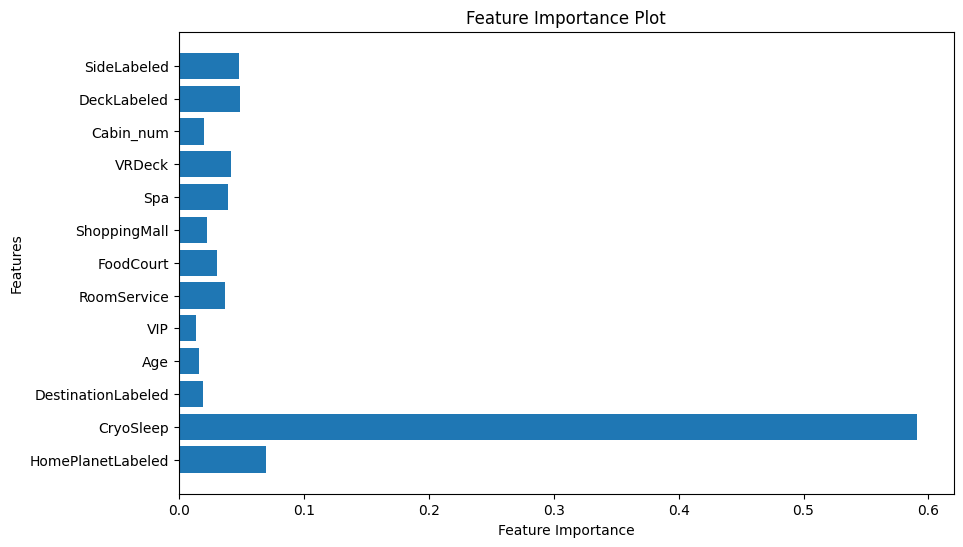

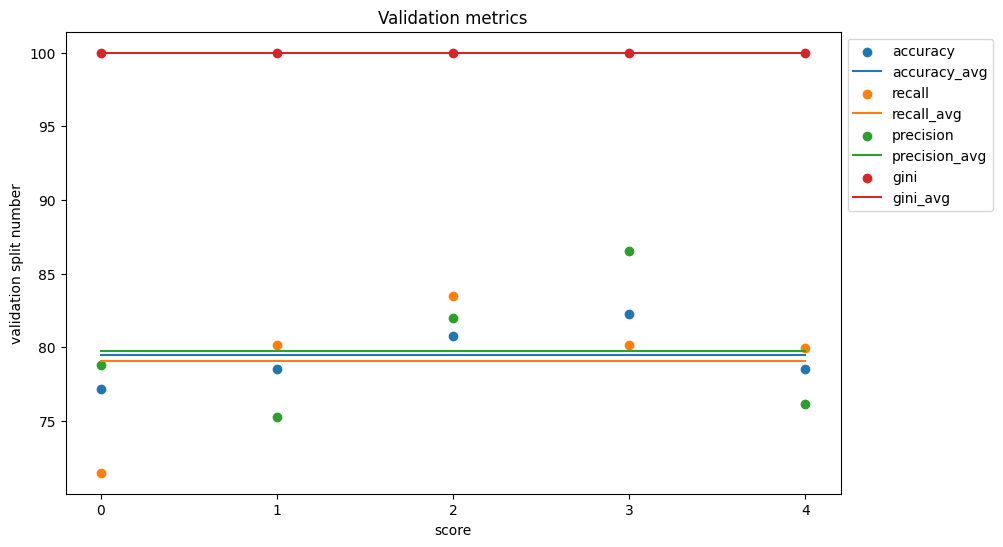

In [16]:
features = ['HomePlanetLabeled','CryoSleep','DestinationLabeled','Age','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Cabin_num','DeckLabeled','SideLabeled']
y = df["Transported"]
X = df[features]

model = MLWorker(X, y)
model.run()